In [78]:
import geopy 
from geopy.geocoders import Nominatim 
import time
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df['coords'] = list(zip(df['lat'],df['long']))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [7]:
df.date.max()

'9/9/2021'

In [8]:
df.date.min()

'1/1/2022'

In [10]:
df.date.value_counts()

7/1/2021      196
8/2/2021      186
6/23/2021     176
7/6/2021      176
6/16/2021     174
             ... 
6/9/2022        1
1/16/2022       1
12/25/2021      1
12/5/2021       1
12/26/2021      1
Name: date, Length: 365, dtype: int64

In [11]:
# eliminating rows with null values (but we could fill with more important information)
df = df.dropna()

In [12]:
df.shape

(30111, 26)

In [13]:
X = df.drop(columns = ['price'])
y = df['price']

In [14]:
X.corr()

/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_5151/1968499000.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.007065,-0.012382,-0.028234,-0.119276,0.031941,-0.023340,-0.015077,-0.008044,-0.041644,0.023076,-0.028858,-0.000764,0.000638
bedrooms,-0.007065,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,0.145497,0.015369,0.108883,-0.106791
bathrooms,-0.012382,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,0.443379,0.041574,-0.005481,0.017684
sqft_living,-0.028234,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,0.291242,0.039089,0.102205,-0.087625
sqft_lot,-0.119276,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,0.001897,0.009390,0.030041,-0.034408
floors,0.031941,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,0.544314,-0.025041,-0.218174,0.233589
sqft_above,-0.023340,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,0.387253,0.011036,0.092317,-0.082722
sqft_basement,-0.015077,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,-0.230783,0.054032,0.059664,-0.045104
sqft_garage,-0.008044,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,0.447720,-0.098301,0.092092,-0.096639
sqft_patio,-0.041644,0.183660,0.327982,0.396530,0.154575,0.125016,0.312593,0.210305,0.216512,1.000000,0.138112,0.056183,-0.019666,0.025675


/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_5151/3632187779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


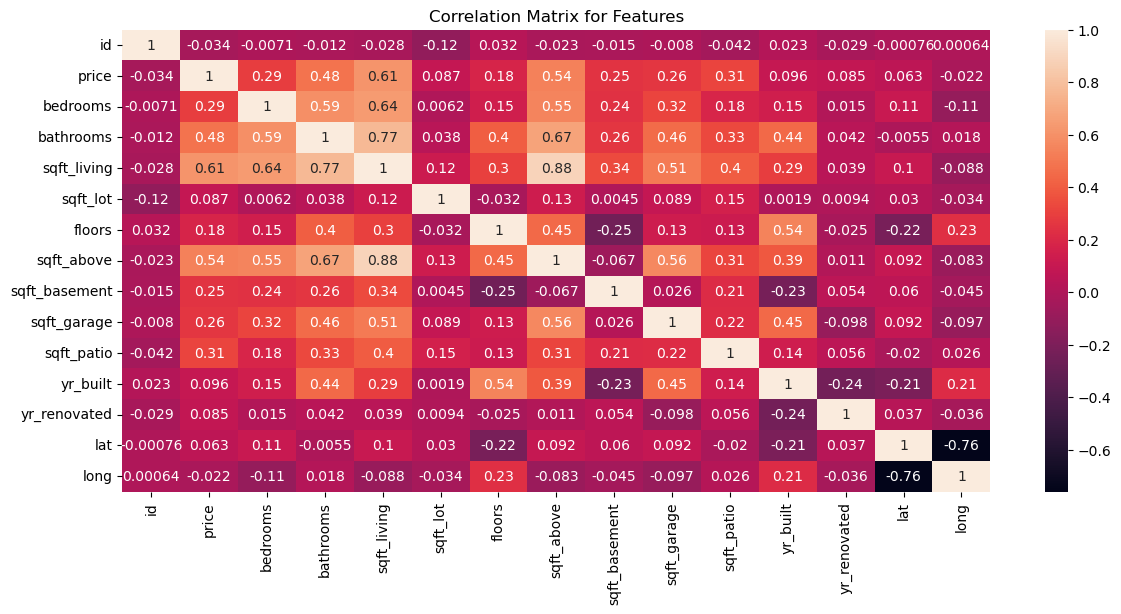

In [20]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

In [29]:
# THIS IS MY BASE MODEL

X = df[['sqft_living']]
y = df['price']

from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.3704130992053277

<Axes: xlabel='sqft_living', ylabel='price'>

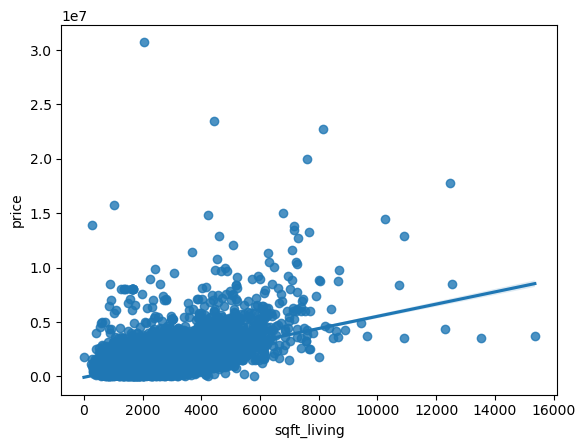

In [25]:
sns.regplot(x =df['sqft_living'],y = df['price'])

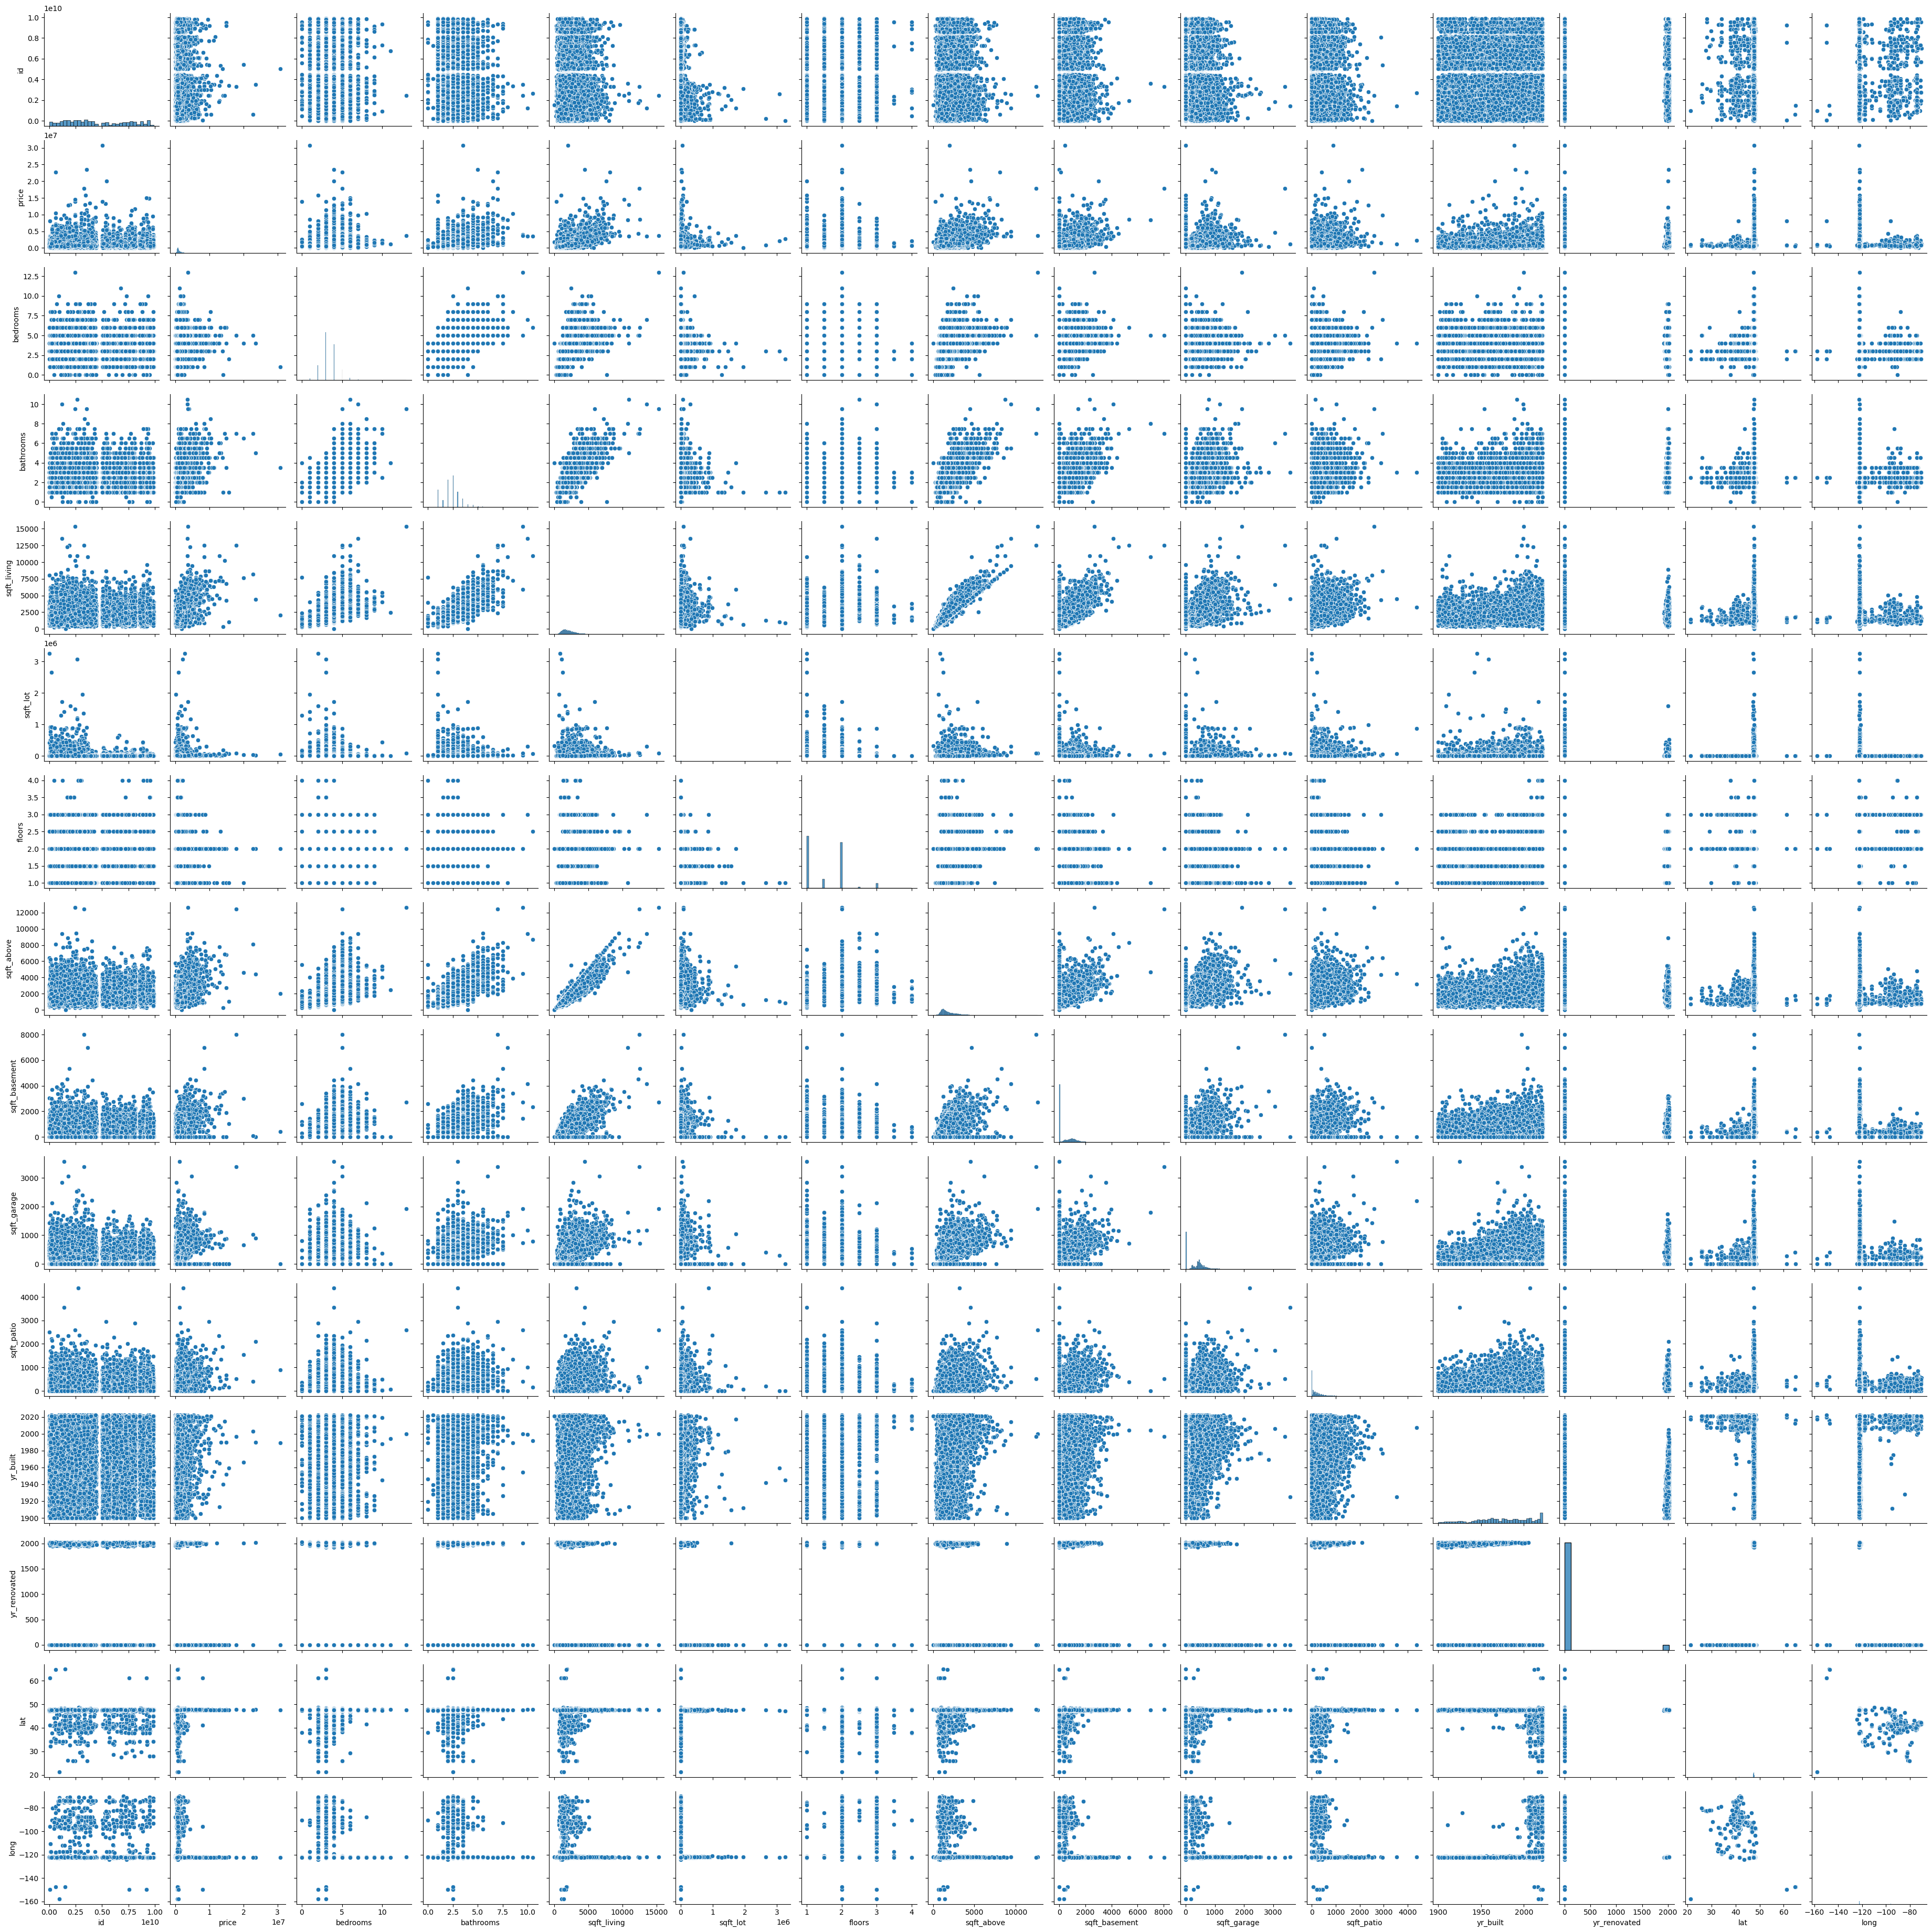

In [30]:
sns.pairplot(df)

In [34]:
df['bedrooms'].value_counts()

3     12746
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

<Axes: xlabel='bedrooms', ylabel='Count'>

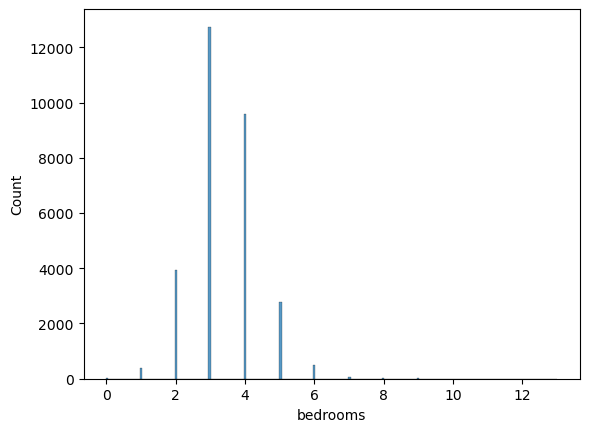

In [35]:
sns.histplot(data = df['bedrooms'])

In [36]:
# https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::zipcodes-for-king-county-and-surrounding-area-shorelines-zipcode-shore-area/explore

In [ ]:
# https://gis-kingcounty.opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113/about

In [54]:
df['zipcodes'] = df['address'].apply(lambda x: x[-20:-15])

In [55]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,coords,zipcodes
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,"(47.461975, -122.19052)",98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,"(47.711525, -122.35591)",98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,"(47.502045, -122.2252)",98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,"(47.56611, -122.2902)",98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,"(47.53247, -122.07188)",98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,"(47.66474, -122.3294)",98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,"(47.56561, -122.38851)",98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,"(47.610395, -122.29585)",98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,"(47.44949, -122.18908)",98055


In [56]:
## Do an inner join and groupby on this
#first import zipcode csv from king co website
dfz = pd.read_csv('data/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv')
dfz.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,147643.355747,5.253133e+08
1,2,98002,98002,33,Standard,King County,AUBURN,104440.086791,2.053028e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,123619.720418,3.169395e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,109051.119162,2.017598e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116554.737369,2.114337e+08


In [58]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        209 non-null    int64  
 1   ZIP             209 non-null    int64  
 2   ZIPCODE         209 non-null    int64  
 3   COUNTY          209 non-null    int64  
 4   ZIP_TYPE        209 non-null    object 
 5   COUNTY_NAME     209 non-null    object 
 6   PREFERRED_CITY  209 non-null    object 
 7   Shape_Length    209 non-null    float64
 8   Shape_Area      209 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 14.8+ KB


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [61]:
# zipcodes in King Co imported table in integer format, but string in our dataframe
# need to convert zipcode column into integer
df['zipcodes'] = df['zipcodes'].apply(lambda x: int(x))

In [62]:
df['zipcodes']

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zipcodes, Length: 30111, dtype: int64

In [63]:
## define dfz to only be the zipcode column on which we will merge and the 
# preferred_city
dfz.columns

Index(['OBJECTID', 'ZIP', 'ZIPCODE', 'COUNTY', 'ZIP_TYPE', 'COUNTY_NAME',
       'PREFERRED_CITY', 'Shape_Length', 'Shape_Area'],
      dtype='object')

In [66]:
dfz = dfz[['ZIPCODE', 'PREFERRED_CITY']]

In [1]:
dfz

NameError: name 'dfz' is not defined

In [80]:
# mergeeeee
df = df.merge(dfz, how = 'left', left_on = 'zipcodes', right_on = 'ZIPCODE')

KeyError: 'zipcodes'

In [ ]:
len(df['zipcodes'].value_counts())

In [ ]:
# WE REDUCED OUR CATEGORICALS TO 40 FROM 400

399